<a href="https://colab.research.google.com/github/mayurimagdum/MachineLearning/blob/master/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(2)
data = data.drop('customerID',axis =1)

In [3]:
data.shape

(7043, 20)

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data['TotalCharges'] = data['TotalCharges'].replace(" " , np.nan)
data = data[data['TotalCharges'].notnull()]
data = data.reset_index()[data.columns]

data['TotalCharges']  = data['TotalCharges'].astype(float)

# Relacing no internate service by no

Replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

for i in Replace :
    data[i]  = data[i].replace({'No internate Service' : 'No'})
    
data['MultipleLines'] = data['MultipleLines'].replace({'MultipleLines' : 'No'})

def tenure_lab(data) :
    
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
data["tenure_group"] = data.apply(lambda data:tenure_lab(data), axis = 1)
data['tenure_group'].value_counts()

data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [6]:

data = data.drop('tenure', axis = 1)
# Seperating Churn Data 
Churn = data[data['Churn'] == 'Yes']
Nourn = data[data['Churn'] == 'No']


Text(0.5, 1.0, 'Churn = Yes Vs Tenure')

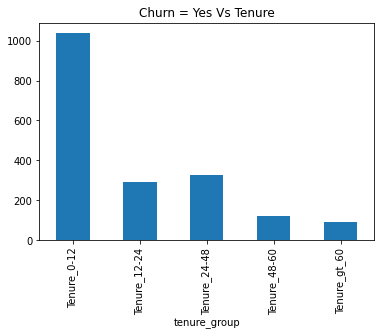

In [7]:
# Data Exploration 

TenureChurn = Churn.groupby('tenure_group').size()
TenureChurn.plot(kind = 'bar')
plt.title('Churn = Yes Vs Tenure')



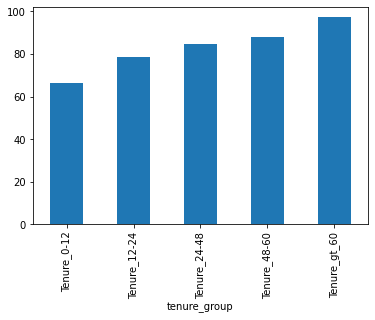

In [8]:
Avg = Churn.groupby(['tenure_group'])['MonthlyCharges'].mean()
Avg.plot(kind ='bar')

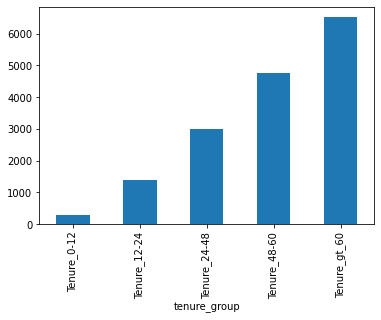

In [9]:
Avg = Churn.groupby(['tenure_group'])['TotalCharges'].mean()
Avg.plot(kind ='bar')

In [10]:
 dict = data.columns.to_series().groupby(data.dtypes).groups

In [11]:
categorical = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
        'tenure_group','SeniorCitizen']

binary_col = data.nunique()[data.nunique() == 2].keys().tolist()
multiple_col = [i for i in categorical if i not in binary_col]
numerical = ['MonthlyCharges', 'TotalCharges']


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in binary_col:
    data[i] = encoder.fit_transform(data[i])
    
# Dummy variabel coding
data = pd.get_dummies(data= data, columns = multiple_col) 


In [12]:
data_final = data.drop(['MonthlyCharges', 'TotalCharges'],axis=1)

In [13]:
df1 = data[['MonthlyCharges', 'TotalCharges']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)
scaled = pd.DataFrame(scaled, columns= ['MonthlyCharges_1', 'TotalCharges_1'])

In [14]:
data_final = pd.concat([data_final,scaled], axis = 1)
data_final.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges_1,TotalCharges_1
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0.196178,-0.940457


In [15]:
from sklearn.model_selection import train_test_split 
X = data_final.drop('Churn', axis =1)
y = data['Churn']


In [16]:
print(X.shape, y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
print(X_train.shape,y_train.shape)


(7032, 44) (7032,)
(5625, 44) (5625,)


In [35]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from scipy.stats import randint
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
clf = RandomForestClassifier(n_jobs = -1)

random_prams ={
    'max_depth': [3,5,1,4,'None'],
    'n_estimators': [50,100,200,150,210],
    'criterion'   : ['entropy','gini'],
    'bootstrap'   : ['True','False'],
    'min_samples_leaf' : randint(1,4),
   }

def hyper_tuning(clf, p_destr, n_iter,X,y):
    randsearch = RandomizedSearchCV(clf, param_distributions= p_destr, n_jobs= -1, n_iter=n_iter,cv= 5 )
    randsearch.fit(X,y)
    ht_params = randsearch.best_params_
    ht_score = randsearch.best_score_
    return ht_params,ht_score

In [28]:
rf_parameters, rf_score = hyper_tuning(clf,random_prams,10,X,y)

In [29]:
print(rf_parameters, rf_score)

{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 210} 0.7949365143394994


In [30]:
classifier = RandomForestClassifier(bootstrap= 'True',
                                    criterion= 'gini',
                                    max_depth= 5,
                                    min_samples_leaf= 2,
                                    n_estimators= 210)
classifier.fit(X_train,y_train)
y_predict  = classifier.predict(X_test)
accuracy  = accuracy_score(y_test,y_predict)
probabilities = classifier.predict_proba(X_test)
print('Validation Accuracy is:',round(accuracy,2))

Validation Accuracy is: 0.78


In [31]:
print ("\n Classification report : \n",classification_report(y_test,y_predict))


 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.65      0.41      0.51       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



Area under curve :  0.6665609744733941 



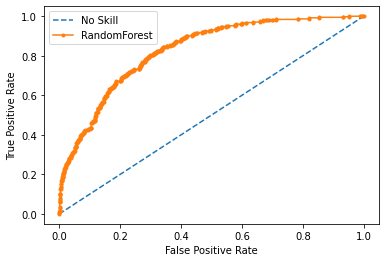

In [32]:
# ROC_AUC_SCORE

roc_auc = roc_auc_score(y_test,y_predict)
print ("Area under curve : ",roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
scores = pd.DataFrame(classifier.feature_importances_)
columns= pd.DataFrame(X_train.columns)
feature_imp = pd.concat([columns,scores],axis = 1)
feature_imp.columns = ['Features','Score']


In [ ]:
 top_5_feature =feature_imp.sort_values(by = 'Score', ascending= False).reset_index(drop = True)[:5]

In [ ]:
#plotting the co efficients

f,ax = plt.subplots(figsize = (6,6))
sns.barplot(top_5_feature.Score,top_5_feature.Features)
plt.show()


In [51]:
# feature selector function 
import functools
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

def feature_selection(k_value=2, name='RandomForest', model=XGBClassifier(random_state=42)):
  # number features 
  k=k_value 
  f_class = functools.partial(f_classif)

  # features | label 
  X = data_final.drop('Churn', axis =1)
  y = data['Churn']

  # Train test spliting
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

  #Filtering features
  seletor = SelectKBest(score_func=f_class, k=k)
  X_train2 = seletor.fit_transform(X_train, y_train)
  X_test2 = seletor.transform(X_test)

  # Random Forest Model
  mdl = model
  mdl.fit(X_train2, y_train)
  y_pred = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:,1]

  #Metrics
  accuracy = round(accuracy_score(y_test, y_pred),2)
  precision = round(precision_score(y_test, y_pred),2)
  recall = round(recall_score(y_test, y_pred),2)
  #precision_recall = round(average_precision_score(y_test, y_proba),2)
  auc = round(roc_auc_score(y_test, y_proba),2)
  

  print('K: {} | Accuracy: {}'.format(k, accuracy))
  print('K: {} | Precision: {}'.format(k, precision))
  print('K: {} | Recall: {}'.format(k, recall))
  #print('K: {} | Precision-Recall: {}'.format(k, precision_recall))
  print('K: {} | AUC: {}'.format(k, auc))
  print('\n')
  print('\n')

  mask = seletor.get_support()
  best_features = X.columns[mask]
  print('----- Best {} features {} --------'.format(k, name))
  print('\n')
  print(best_features)


In [54]:
feature_selection(k_value=10, name='XGBoost', model=XGBClassifier(random_state=42))

K: 10 | Accuracy: 0.79
K: 10 | Precision: 0.62
K: 10 | Recall: 0.49
K: 10 | AUC: 0.82




----- Best 10 features XGBoost --------


Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_gt_60'],
      dtype='object')


In [55]:
from sklearn.linear_model import LogisticRegression
feature_selection(k_value=10, name='LogisticRegression', model=LogisticRegression(random_state=42))

K: 10 | Accuracy: 0.79
K: 10 | Precision: 0.63
K: 10 | Recall: 0.49
K: 10 | AUC: 0.83




----- Best 10 features LogisticRegression --------


Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_gt_60'],
      dtype='object')


In [56]:
from sklearn.ensemble import RandomForestClassifier
feature_selection(k_value=10, name='RandomForest', model=RandomForestClassifier(random_state=42))

K: 10 | Accuracy: 0.79
K: 10 | Precision: 0.62
K: 10 | Recall: 0.51
K: 10 | AUC: 0.81




----- Best 10 features RandomForest --------


Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'tenure_group_Tenure_0-12', 'tenure_group_Tenure_gt_60'],
      dtype='object')
